# Time-varying frame
Renato Naville Watanabe

Consider that we have the position vector of a particle, moving in the path described by the parametric curve $s(t)$, described in a fixed reference frame as:

$${\bf\hat{r}}(t) = {x}{\bf\hat{i}}+{y}{\bf\hat{j}} + {z}{\bf\hat{k}}$$

<img src="../images/velRefFrame.png" width=500/>

 


Often we describe all the kinematic variables in this fixed reference frame. However, it is often useful to define a time-varying basis, attached to some point of interest. In this case, what is usually done is to choose as one of the basis vector a unitary vector in the direction of the velocity of the particle. Defining this vector as:

$${\bf\hat{e}_t} = \frac{{\bf\vec{v}}}{\Vert{\bf\vec{v}}\Vert}$$

For the second vector of the basis, we define first a vector of curvature of the path (the meaning of this curvature vector will be seeing in another notebook):

$$ {\bf\vec{C}} = \frac{d{\bf\hat{e}_t}}{ds}$$

Note that $\bf\hat{e}_t$ is a function of the path $s(t)$. So, by the chain rule:

$$ \frac{d{\bf\hat{e}_t}}{dt} = \frac{d{\bf\hat{e}_t}}{ds}\frac{ds}{dt} \longrightarrow \frac{d{\bf\hat{e}_t}}{ds} = \frac{\frac{d{\bf\hat{e}_t}}{dt}}{\frac{ds}{dt}} \longrightarrow {\bf\vec{C}} = \frac{\frac{d{\bf\hat{e}_t}}{dt}}{\frac{ds}{dt}}\longrightarrow {\bf\vec{C}} = \frac{\frac{d{\bf\hat{e}_t}}{dt}}{\Vert{\bf\vec{v}}\Vert}$$

Now we can define the second vector of the basis, ${\bf\hat{e}_n}$:

$${\bf\hat{e}_n} = \frac{{\bf\vec{C}}}{\Vert{\bf\vec{C}}\Vert}$$

<img src="../images/velRefFrameeten.png" width=500/>

The third vector of the basis is obtained by the cross product between ${\bf\hat{e}_n}$ and ${\bf\hat{e}_t}$.

$${\bf\hat{e}_b} = {\bf\hat{e}_t} \times {\bf\hat{e}_n} $$

Note that the vectors ${\bf\hat{e}_t}$, ${\bf\hat{e}_n}$ and ${\bf\hat{e}_b}$ vary together with the particle movement.

## Example
For example, consider that a particle follows the path described by the parametric curve below:

$$\vec{r}(t) = (10t+100){\bf{\hat{i}}} + \left(-\frac{9,81}{2}t^2+50t+100\right){\bf{\hat{j}}}$$

This curve could be, for example, from a projectile motion. See http://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/ProjectileMotion.ipynb for an explanation on projectile motion.

In [4]:
import numpy as np
import sympy as sym
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
sym.init_printing()
from sympy.plotting import plot_parametric
from sympy.physics.mechanics import ReferenceFrame, Vector, dot

### Symbolic solution

The computation here will be performed symbolically, with the symbolic math package of Python, Sympy. Below,a reference frame, called O,  and a varible for time (t) are defined.

In [5]:
O = sym.vector.CoordSys3D(' ')
t = sym.symbols('t')

Below the vector $r(t)$ is defined symbolically.

In [6]:
r = (10*t+100)*O.i + (-9.81/2*t**2+50*t+100)*O.j+0*O.k
r

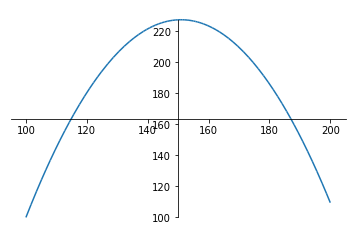

In [7]:
plot_parametric(r.dot(O.i),r.dot(O.j), (t,0,10))

In [8]:
v = sym.diff(r)
v

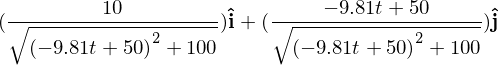

In [9]:
et = v/sym.sqrt(v.dot(v))
et

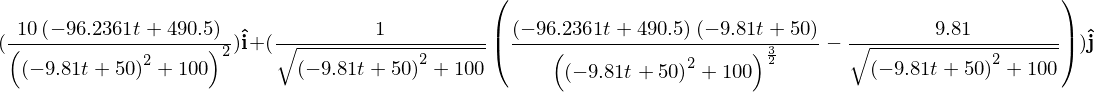

In [10]:
C = sym.diff(et)/sym.sqrt(v.dot(v))
C

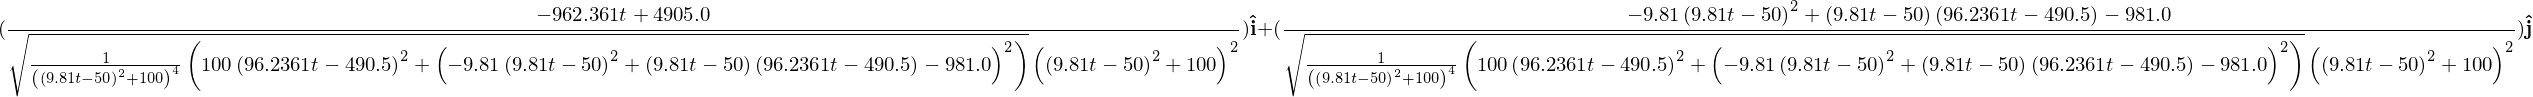

In [11]:
en = C/(sym.sqrt(C.dot(C)))
sym.simplify(en)

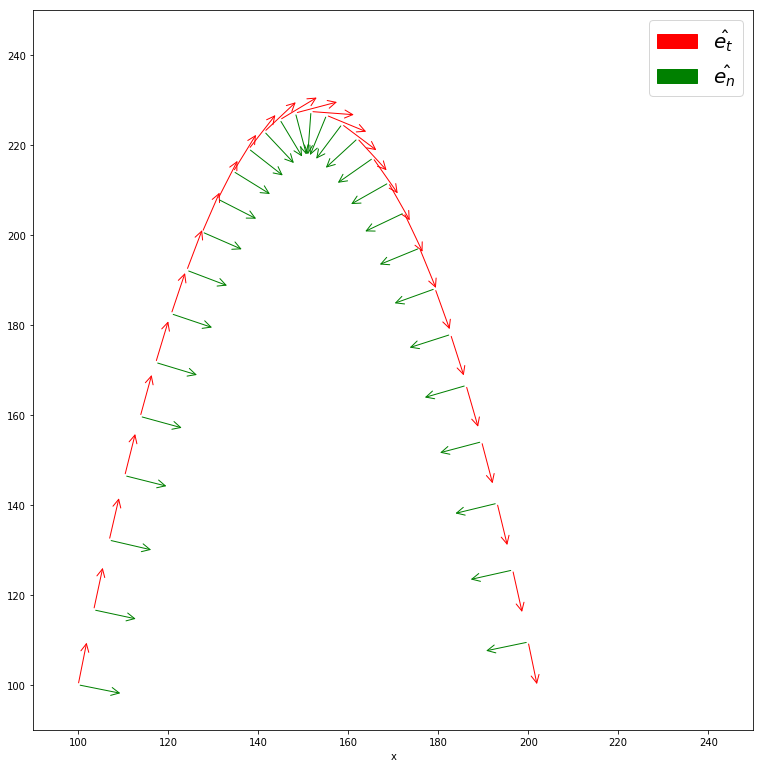

In [12]:
from matplotlib.patches import FancyArrowPatch
plt.rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])    
ax.axis("on")
time = np.linspace(0,10,30)
for instant in time:
    vt = FancyArrowPatch([float(r.dot(O.i).subs(t,instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t,instant))+10*float(et.dot(O.i).subs(t,instant)), float(r.dot(O.j).subs(t, instant))+10*float(et.dot(O.j).subs(t,instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="r",label='${\hat{e_t}}$')
    vn = FancyArrowPatch([float(r.dot(O.i).subs(t, instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t, instant))+10*float(en.dot(O.i).subs(t, instant)), float(r.dot(O.j).subs(t, instant))+10*float(en.dot(O.j).subs(t, instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="g",label='${\hat{e_n}}$')
    ax.add_artist(vn)
    ax.add_artist(vt)
plt.xlim((90,250))
plt.ylim((90,250))
plt.xlabel('x')
plt.legend(handles=[vt,vn],fontsize=20)
plt.show()

## Velocity and Acceleration in a time-varying frame

Given the expression of $r(t)$ in a fixed frame (see on the the top of the page) we can write the velocity  
${\bf\vec{v}(t)}$ as a function of the fixed frame of reference ${\bf\hat{i}}$, ${\bf\hat{j}}$ and ${\bf\hat{k}}$ (see (http://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/KinematicsParticle.ipynb)).

$${\bf\vec{v}}(t) = \dot{x}{\bf\hat{i}}+\dot{y}{\bf\hat{j}}+\dot{z}{\bf\hat{k}}$$

However, this can lead to very complex functions. So it is useful to use the basis find previously ${\bf\hat{e}_t}$, ${\bf\hat{e}_n}$ and ${\bf\hat{e}_b}$.

The velocity ${\bf\vec{v}}$ of the particle is, by the definition of ${\bf\hat{e}_t}$, in the direction of ${\bf\hat{e}_t}$:

$${\bf\vec{v}}={\Vert\bf\vec{v}\Vert}.{\bf\hat{e}_t}=v{\bf\hat{e}_t}$$

The acceleration can be written in the fixed frame of reference as:

$${\bf\vec{a}}(t) = \ddot{x}{\bf\hat{i}}+\ddot{y}{\bf\hat{j}}+\ddot{z}{\bf\hat{k}}$$

But for the same reasons of the velocity vector, it is useful to describe the acceleration vector in the time varying basis. We know that the acceleration is the time derivative of the velocity:

$${\bf\vec{a}} = \frac{{d\bf\vec{v}}}{dt}=\frac{{d({\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}})}{dt}=\dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}\dot{{\bf\hat{e}_t}}= \dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}\frac{d{\bf\hat{e}_t}}{ds}\frac{ds}{dt}=\dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}^2\frac{d{\bf\hat{e}_t}}{ds}=\dot{\Vert\bf\vec{v}\Vert}{\bf\hat{e}_t}+{\Vert\bf\vec{v}\Vert}^2\Vert{\bf\vec{C}} \Vert{\bf\hat{e}_n}$$

From the example above, we can define the vectors ${\bf\vec{v}}$ and ${\bf\vec{a}}$ in the time varying frame.

In [13]:
v = sym.sqrt(v.dot(v))*et
v

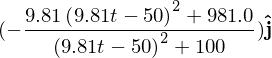

In [14]:
a = sym.diff(sym.sqrt(v.dot(v)))*et+v.dot(v)*sym.sqrt(C.dot(C))*en
sym.simplify(sym.simplify(a))

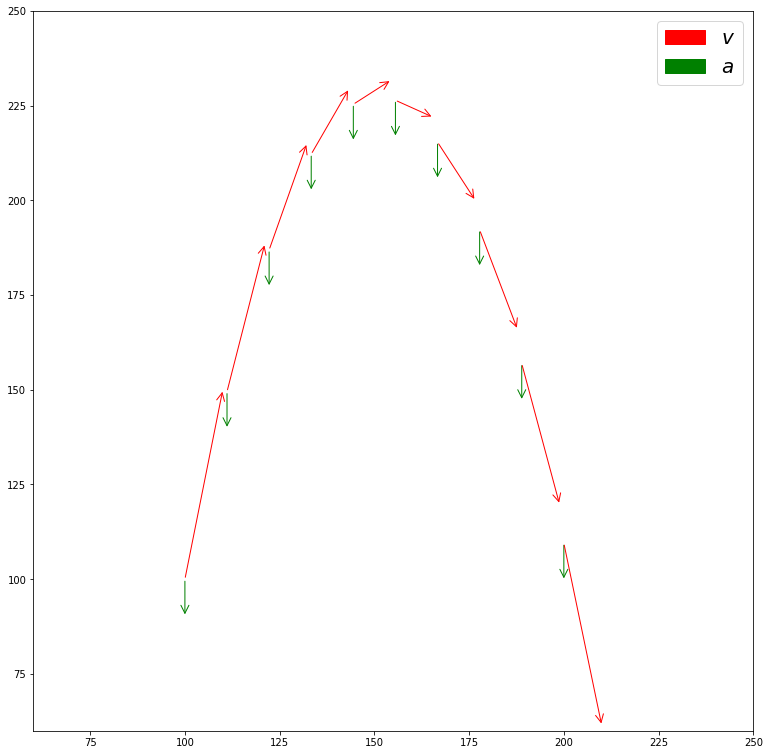

In [15]:
from matplotlib.patches import FancyArrowPatch
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])    
ax.axis("on")
time = np.linspace(0,10,10)
for instant in time:
    vt = FancyArrowPatch([float(r.dot(O.i).subs(t,instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t,instant))+float(v.dot(O.i).subs(t,instant)), float(r.dot(O.j).subs(t, instant))+float(v.dot(O.j).subs(t,instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="r",label='${{v}}$')
    vn = FancyArrowPatch([float(r.dot(O.i).subs(t, instant)),float(r.dot(O.j).subs(t,instant))], 
                         [float(r.dot(O.i).subs(t, instant))+float(a.dot(O.i).subs(t, instant)), float(r.dot(O.j).subs(t, instant))+float(a.dot(O.j).subs(t, instant))], 
                         mutation_scale=20,
                         arrowstyle="->",color="g",label='${{a}}$')
    ax.add_artist(vn)
    ax.add_artist(vt)
plt.xlim((60,250))
plt.ylim((60,250))
plt.legend(handles=[vt,vn],fontsize=20)
plt.show()

## Solving numerically

Now we will obtain the time-varying basis numerically, instead of symbolically. This method is useful when it is not available a mathematical expression of the path. This often happens when you have available data collected experimentally (most of the cases in Biomechanics). 

First, data will be obtained from the expression of $r(t)$. This is done to replicate the example above. You could use data collected experimentally, for example.

In [16]:
t = np.linspace(0,10,30)
r = np.transpose(np.array([10*t +100,-9.81/2*t**2+50*t+100]))
 

Now, to obtain the $\bf{\hat{e_t}}$ versor, we can use Equation (2).

In [17]:
Ts = t[1]
v = np.diff(r,1,0)/Ts
vNorm  = np.sqrt(v[:,0]**2+v[:,1]**2)

et = np.transpose(np.array([v[:,0]/vNorm, v[:,1]/vNorm]))


And to obtain the versor $\bf{\hat{e_n}}$, we can use (5).

In [18]:
C = np.diff(et,1,0)/Ts
C = np.transpose(np.array([C[:,0]/vNorm[1:],C[:,1]/vNorm[1:]]))

CNorm = np.sqrt(C[:,0]**2+C[:,1]**2)
en = np.transpose(np.array([C[:,0]/CNorm,C[:,1]/CNorm]))


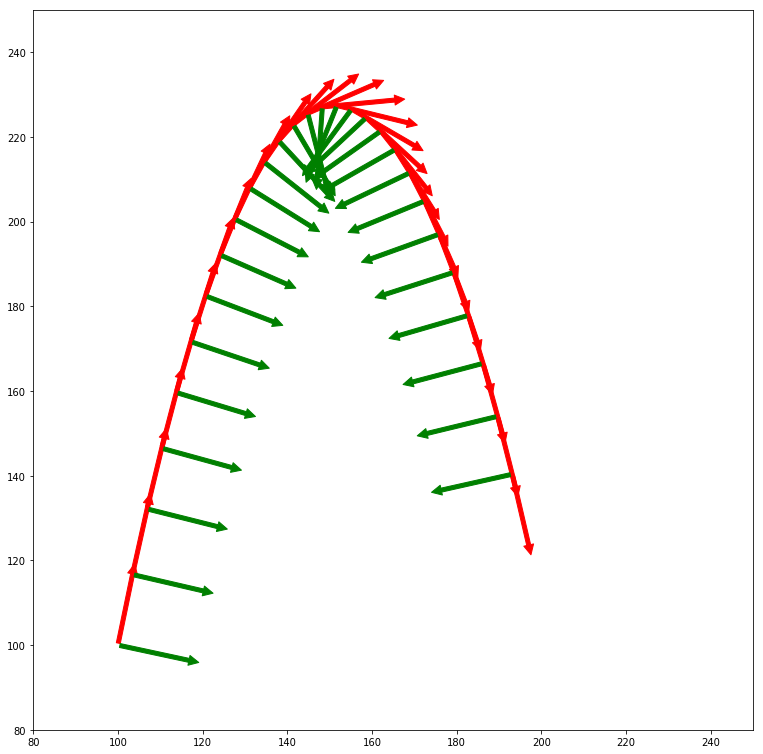

In [19]:
from matplotlib.patches import FancyArrowPatch
fig = plt.figure()
plt.plot(r[:,0],r[:,1],'.')
ax = fig.add_axes([0,0,1,1])
time = np.linspace(0,10,10)
for i in np.arange(len(t)-2):
    vec1 = FancyArrowPatch(r[i,:],r[i,:]+20*et[i,:],mutation_scale=20,color='r')
    vec2 = FancyArrowPatch(r[i,:],r[i,:]+20*en[i,:],mutation_scale=20,color='g')
    ax.add_artist(vec1)
    ax.add_artist(vec2)
plt.xlim((80,250))
plt.ylim((80,250))
plt.show()

In [20]:
v  = np.transpose(np.array([vNorm*et[:,0], vNorm*et[:,1]]))
vNormDot  = np.diff(vNorm,1,0)/Ts
a = np.transpose(np.array([vNormDot*et[1:,0]+vNorm[1:]**2*CNorm*en[:,0], 
                           vNormDot*et[1:,1]+vNorm[1:]**2*CNorm*en[:,1]]))

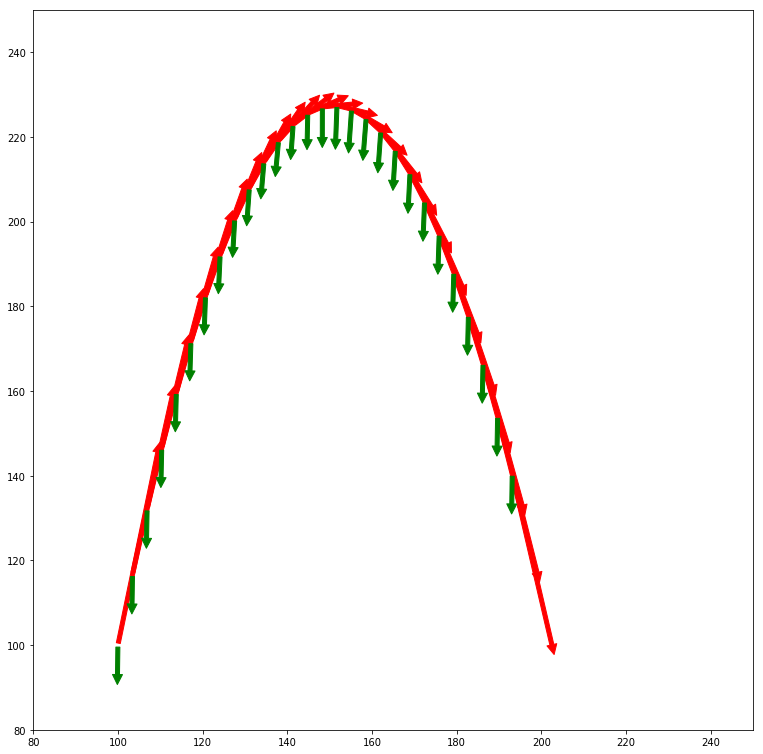

In [21]:
from matplotlib.patches import FancyArrowPatch
%matplotlib inline
plt.rcParams['figure.figsize']=10,10
fig = plt.figure()
plt.plot(r[:,0],r[:,1],'.')
ax = fig.add_axes([0,0,1,1])
for i in np.arange(len(t)-2):
    vec1 = FancyArrowPatch(r[i,:],r[i,:]+v[i,:],mutation_scale=20,color='r')
    vec2 = FancyArrowPatch(r[i,:],r[i,:]+a[i,:],mutation_scale=20,color='g')
    ax.add_artist(vec1)
    ax.add_artist(vec2)
plt.xlim((80,250))
plt.ylim((80,250))
plt.show()


## Problems

1. Obtain the vectors $\hat{e_n}$ and $\hat{e_t}$ for the problem 17.1.1 from Ruina and Rudra's book.
2. Solve the problem 17.1.9 from Ruina and Rudra's book.
3. Write a Python program to solve the problem 17.1.10 (only the part of $\hat{e_n}$ and $\hat{e_t}$).

## References

+ Ruina A, Rudra P (2015) Introduction to Statics and Dynamics. Oxford University Press. http://ruina.tam.cornell.edu/Book/RuinaPratap-Jan-20-2015.pdf